In [1]:
import ratbox
from ratbox.wrappers import ConvertUnicycleWrapper, ConvertSkidWrapper
import gymnasium as gym

import matplotlib.pyplot as plt

Lists of actions which will get the agent to the goal, so long as there are no obstacles in the environment

In [2]:
action_dict = {"discrete": [[0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1],[1,0,0],[0,0,1],[0,0,1],[0,0,1],[0,0,1],[0,0,1]],
              "compass": [[-2,4,4,-2],[-2,4,4,-2],[-2,4,4,-2],[-2,4,4,-2],[-2,4,4,-2],[-2,4,4,-2],[-2,4,4,-2],
                          [-2,4,4,-2],[-2,4,4,-2],[-2,4,4,-2]],
               "ego": [[0.5,0,0.5,0],[10,0,0,0],[10,0,0,0],[10,0,0,0],[10,0,0,0],[10,0,0,0],[10,0,0,0],[10,0,0,0]],
               "unicycle": [[1,0,1,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],
                            [1,0,0,0],[1,0,0,0],[1,0,1,0],[1,0,0,0]],
               "skidsteer": [[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],
                            [1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],
                            [1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],
                            [1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],
                            [1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],
                            [1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],[1,1,100,0],
                            [100,1,100,100],[100,1,100,100],[100,1,100,100],[100,1,100,100],[100,1,100,100],[100,1,100,100],
                            [100,1,100,100],[100,1,100,100],[100,1,100,100],[100,1,100,100],[100,1,100,100],[100,1,100,100],
                            [100,1,100,100],[100,1,100,100],[100,1,100,100],[100,1,100,100],[100,1,100,100],[100,1,100,100],
                            [100,1,100,100],[100,1,100,100],[100,1,100,100],[100,1,100,100],[100,1,100,100]],
              }

Set the steering model and corresponding list of actions

In [3]:
steering = "skidsteer" ## discrete, compass, ego, unicycle, skidsteer

actions = action_dict[steering]

Create the environment

In [4]:
env = gym.make("RatBox-empty-v0", render_mode = "rgb_array", steering = steering)
## Apply wrappers if applicable
if steering == 'unicycle':
    env = ConvertUnicycleWrapper(env)
elif steering == 'skidsteer':
    env = ConvertSkidWrapper(env)

Always reset the environment first. Plot the rgb array so we can see the rat moving around.

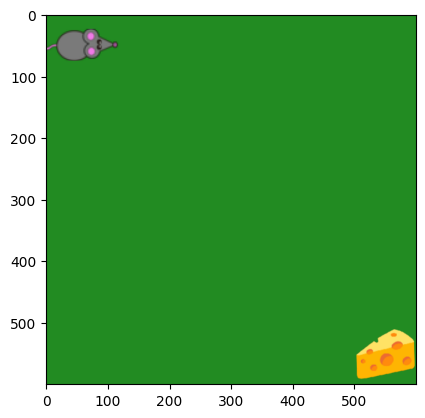

c:\Users\maddy\anaconda3\envs\ratboxenv\Lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.agent to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.agent` for environment variables or `env.get_wrapper_attr('agent')` that will search the reminding wrappers.
  logger.warn(


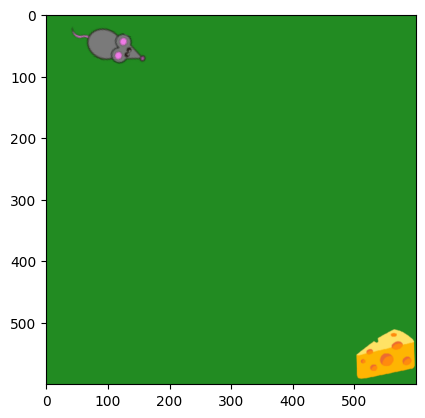

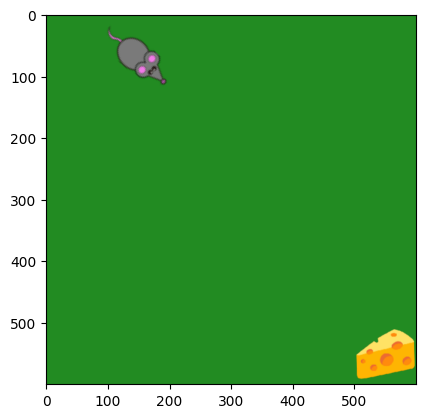

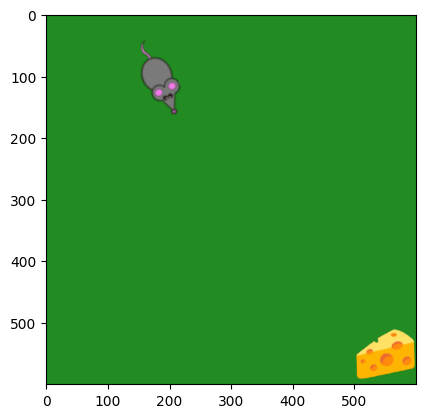

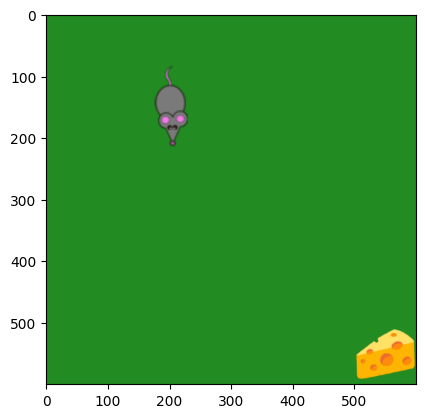

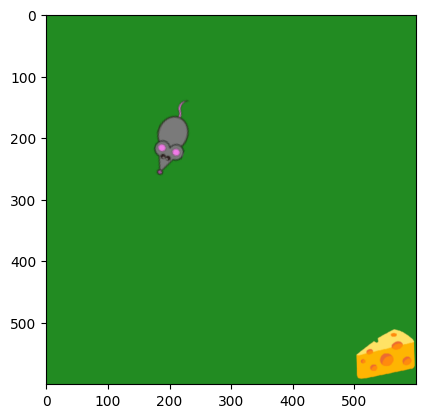

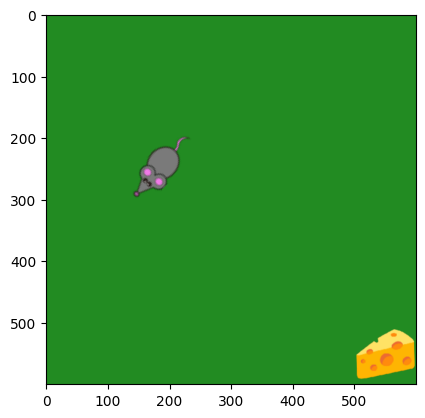

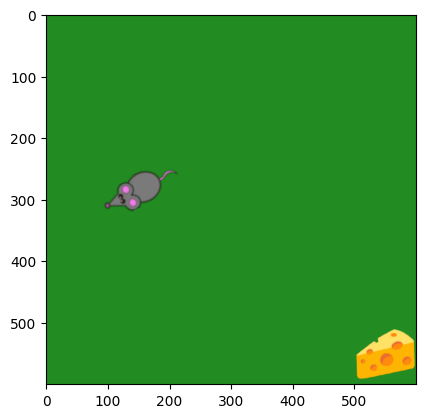

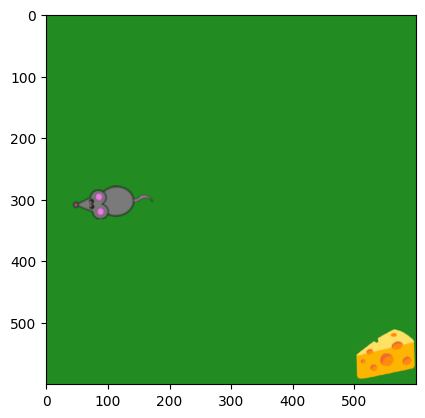

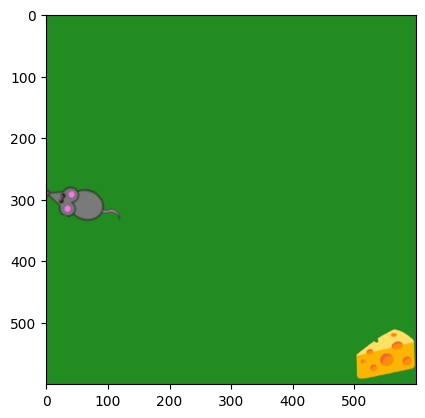

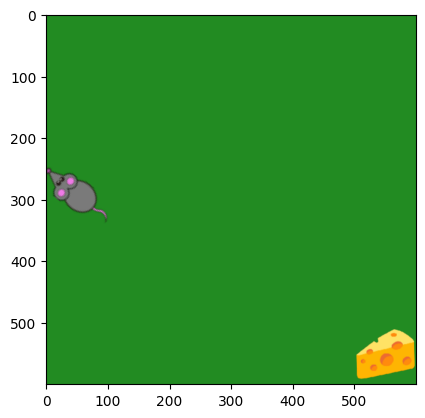

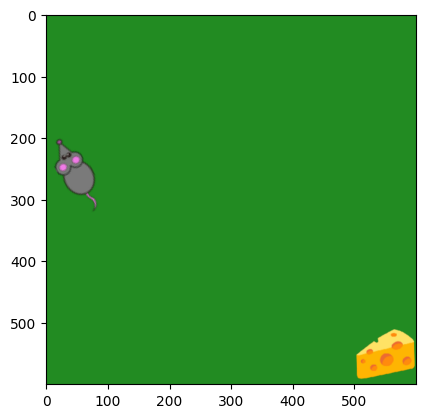

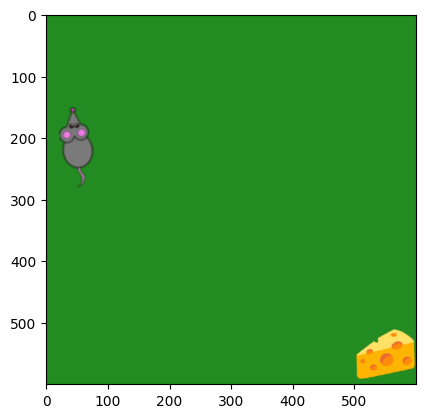

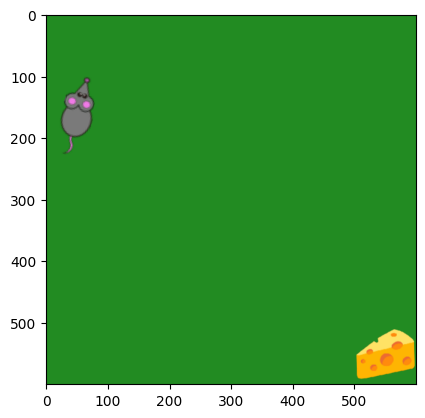

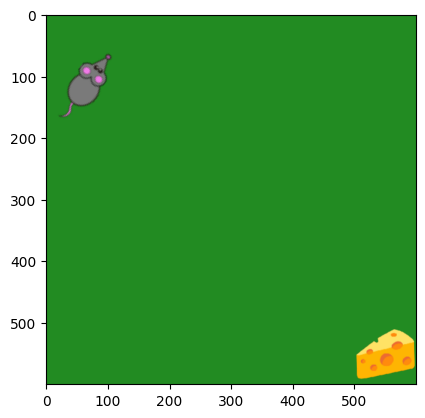

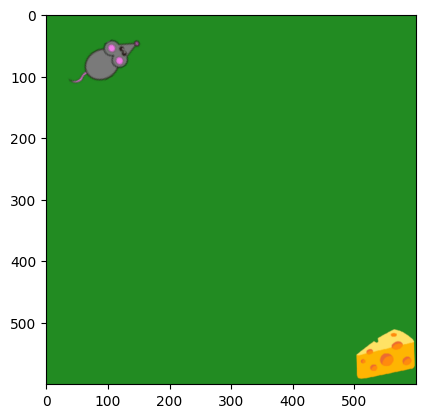

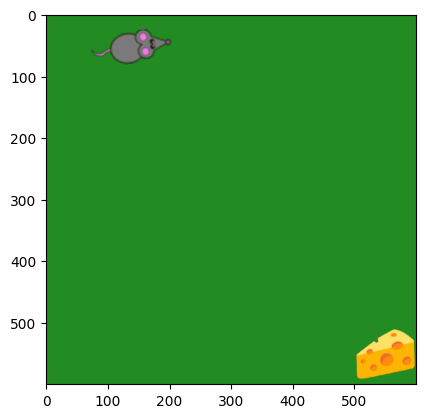

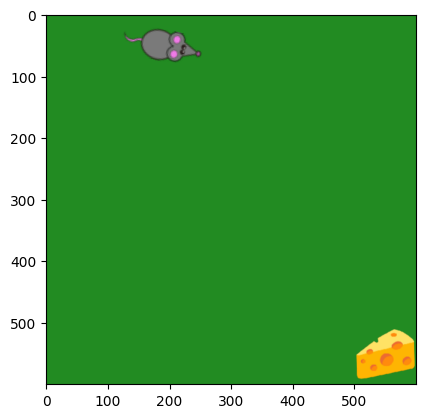

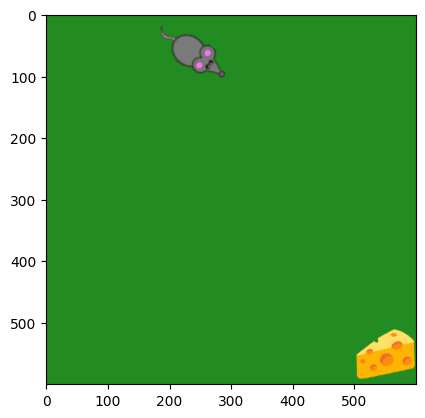

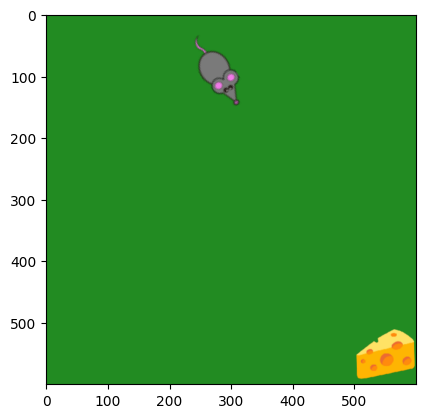

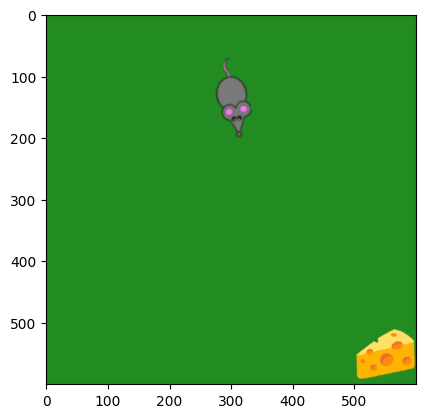

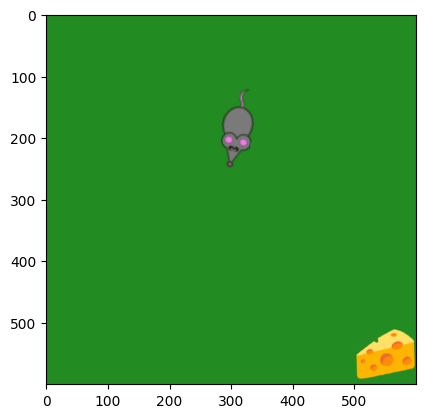

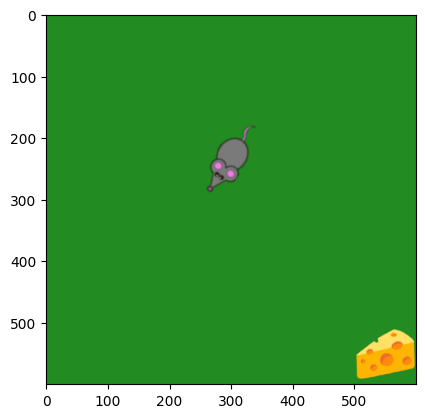

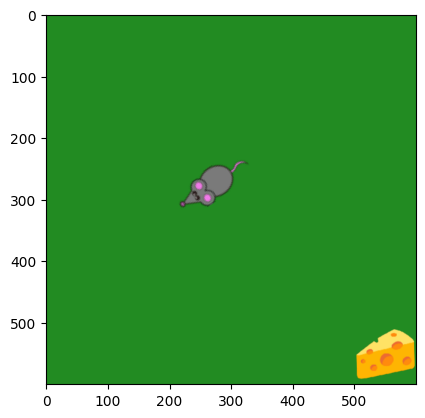

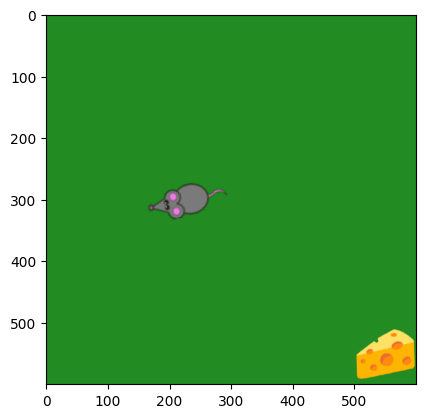

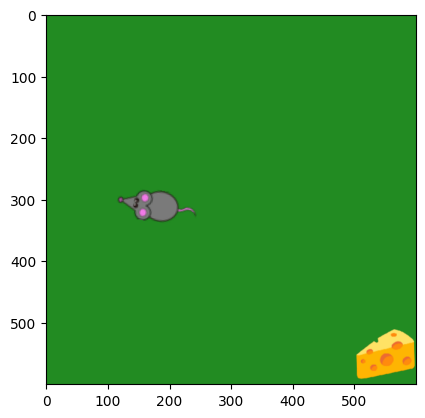

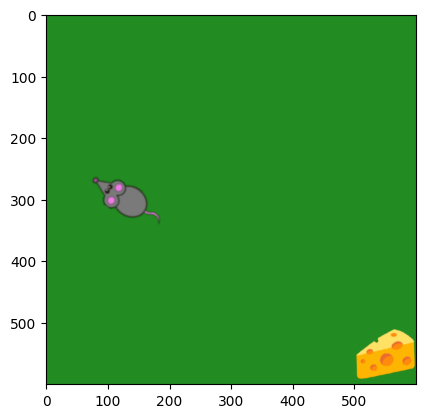

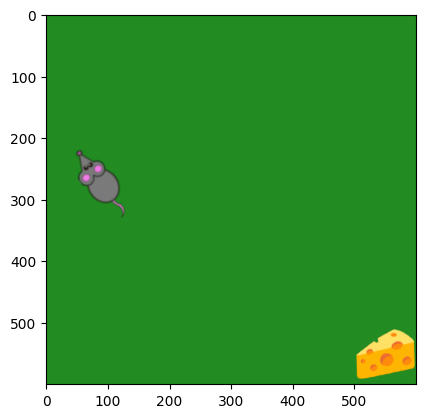

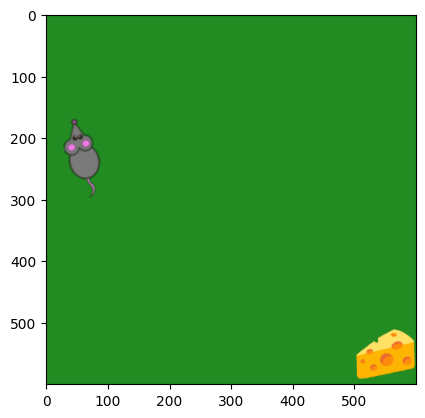

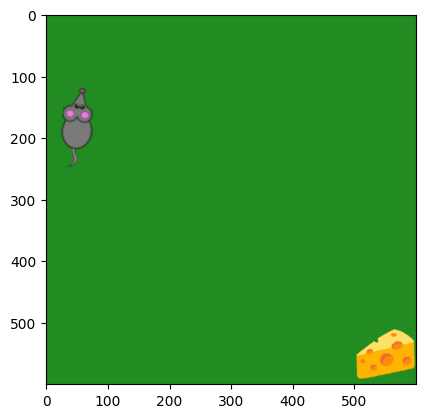

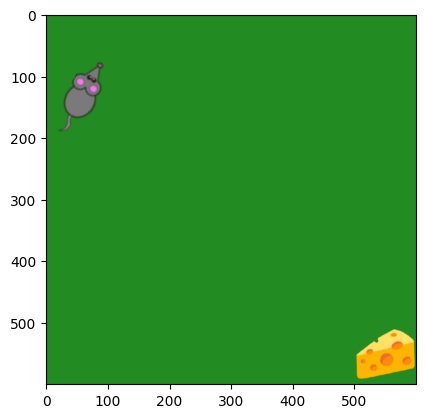

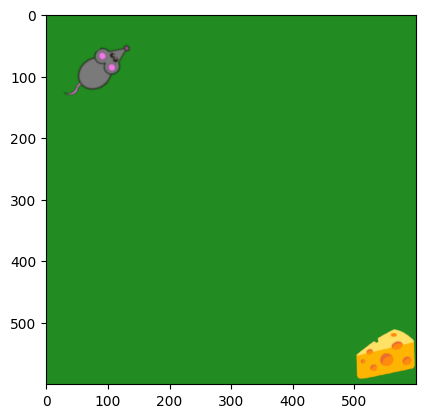

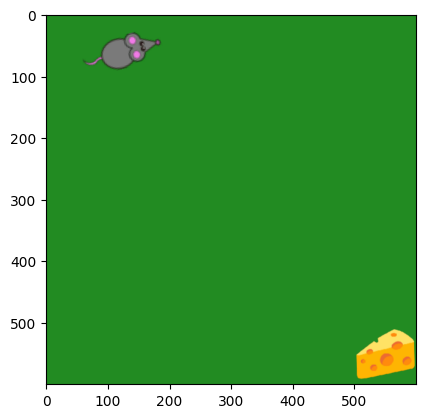

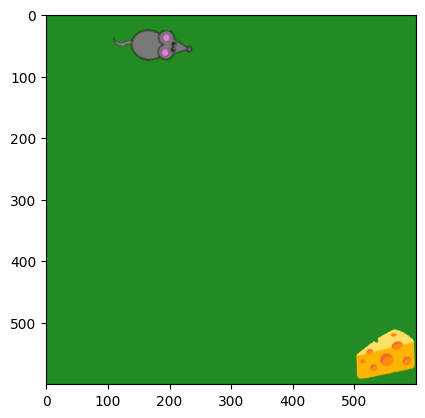

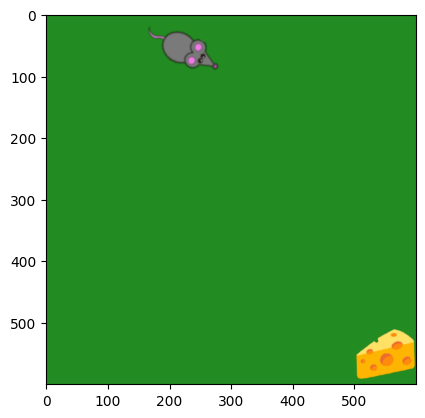

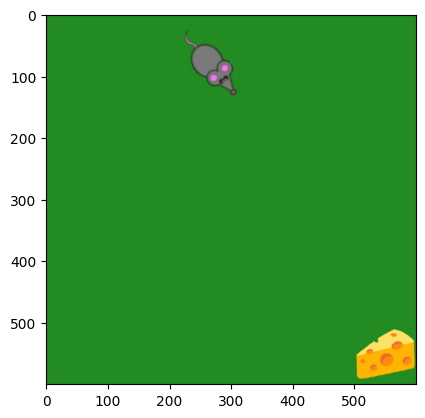

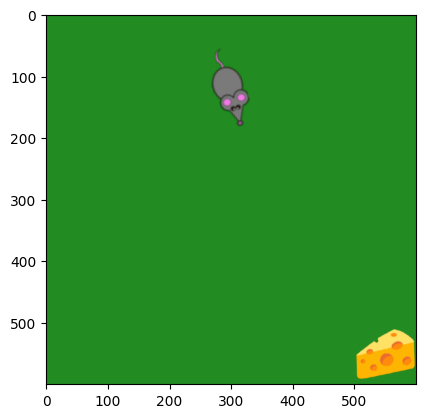

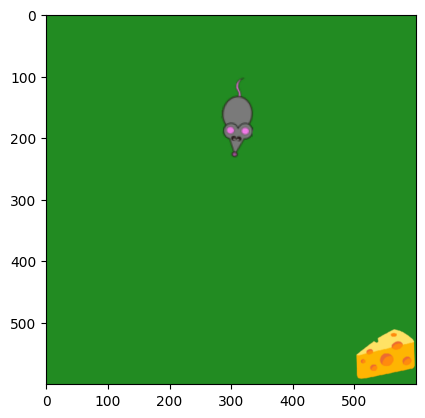

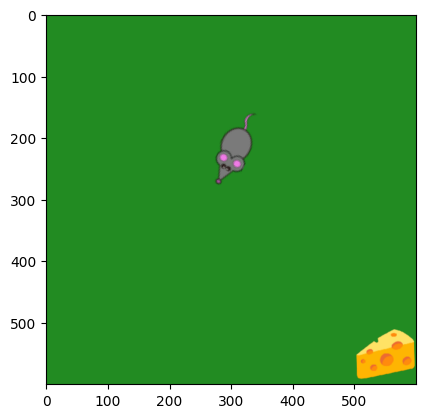

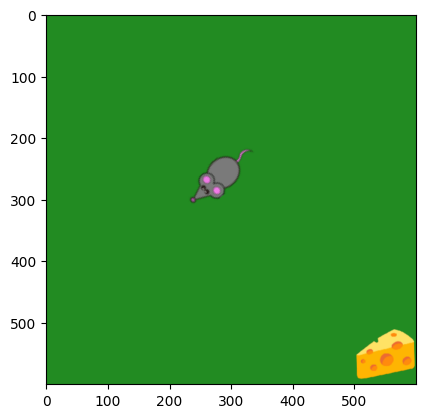

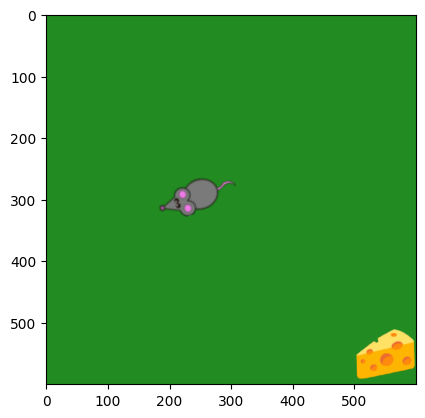

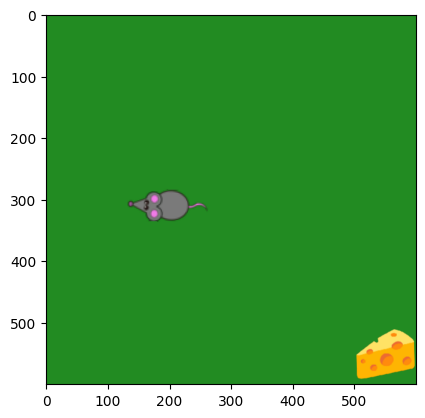

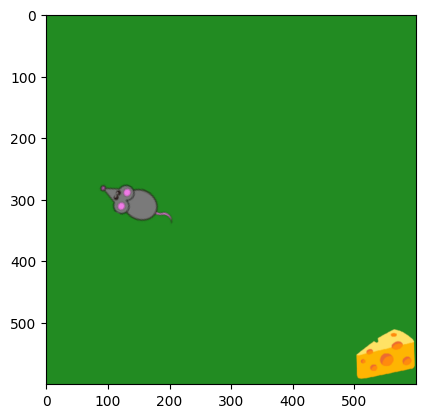

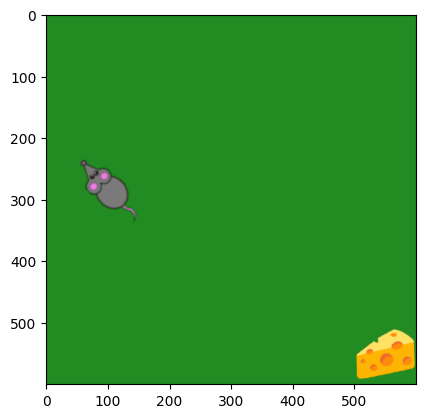

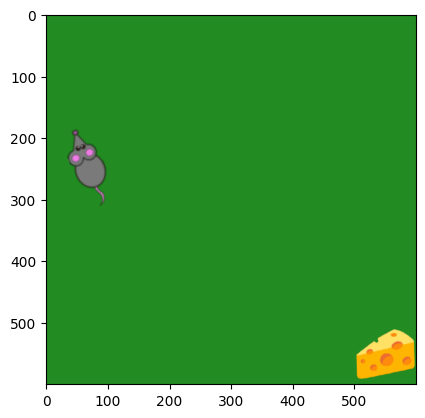

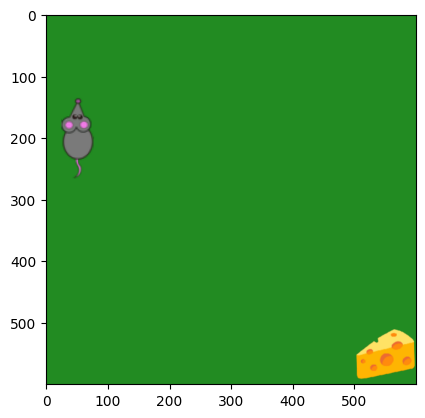

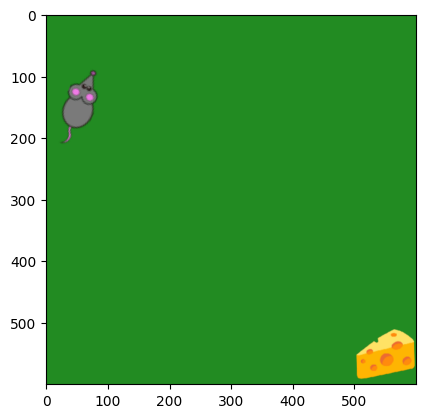

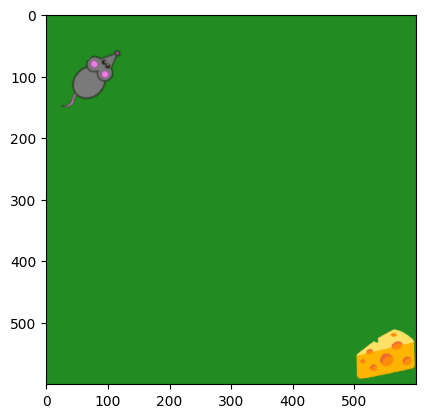

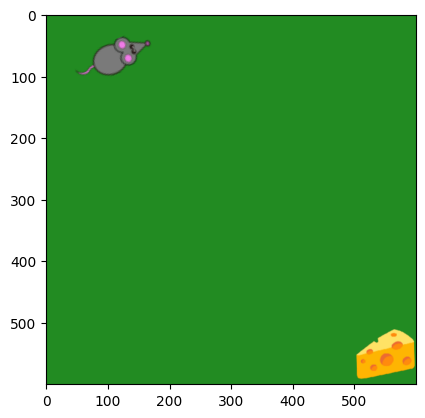

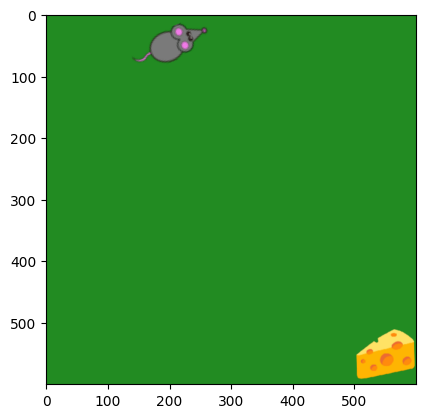

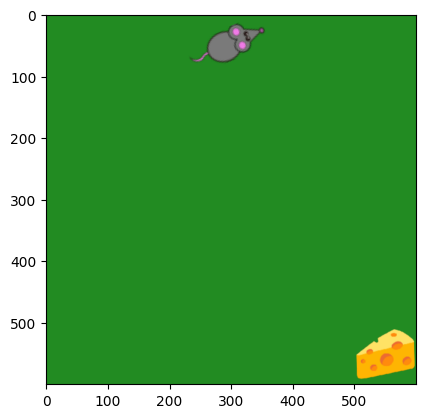

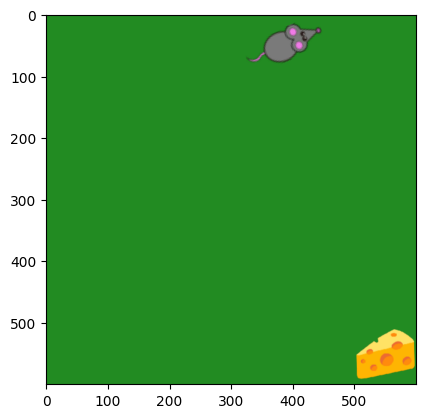

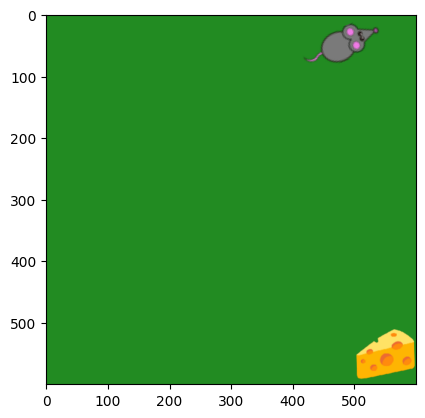

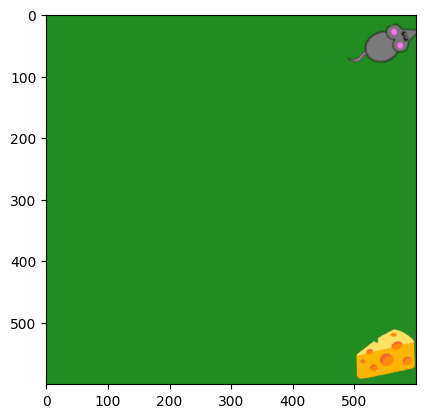

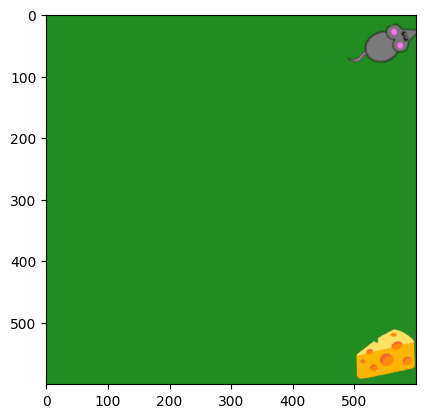

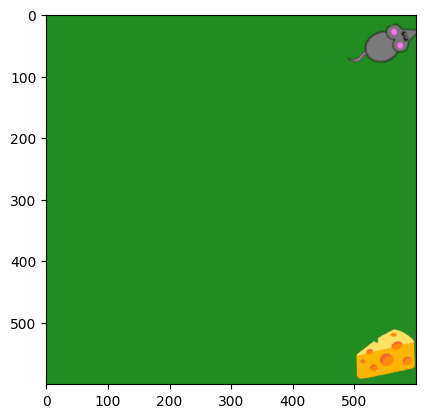

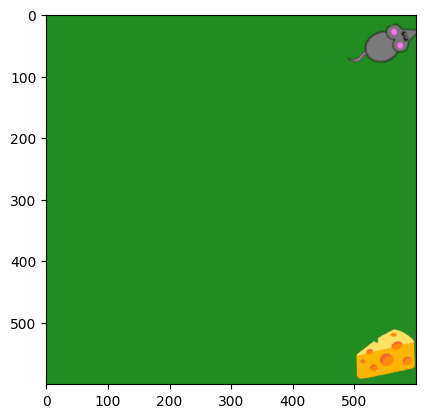

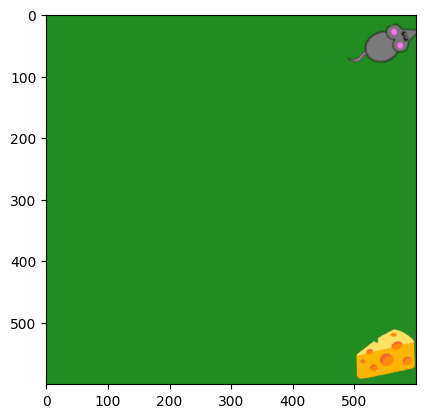

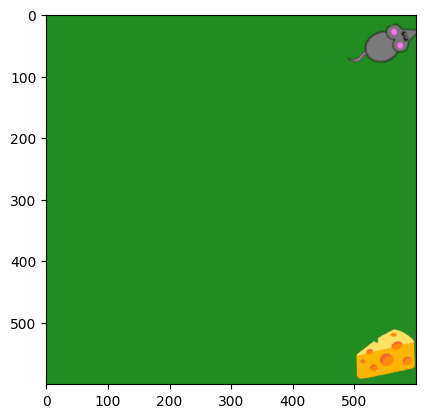

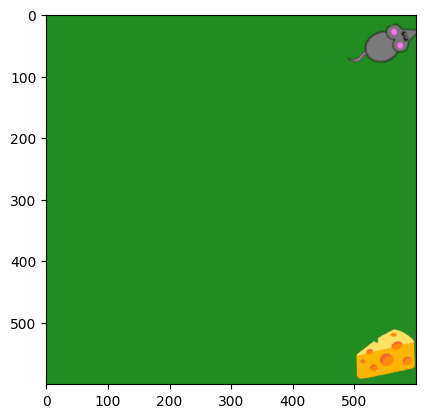

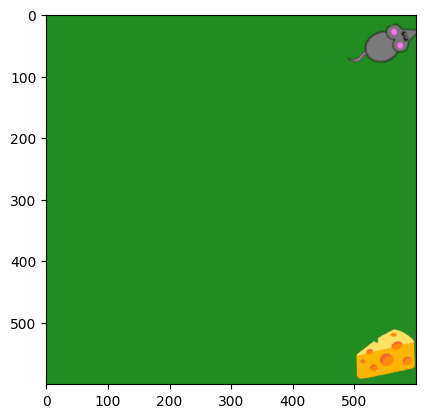

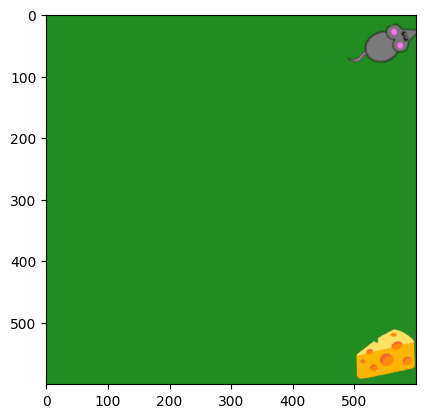

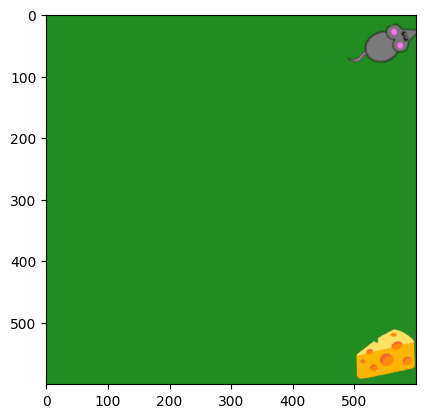

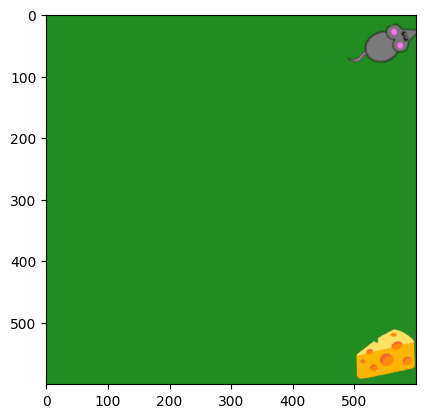

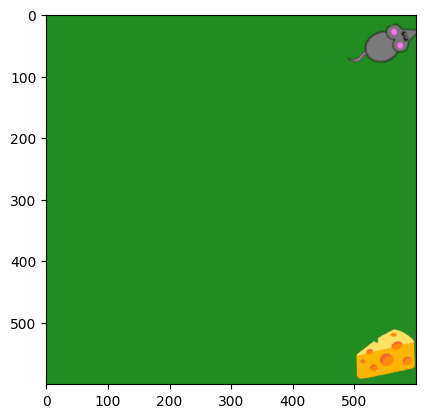

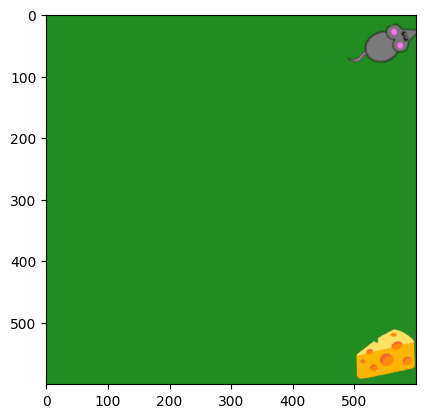

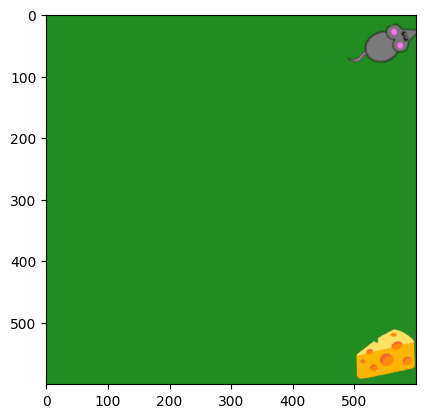

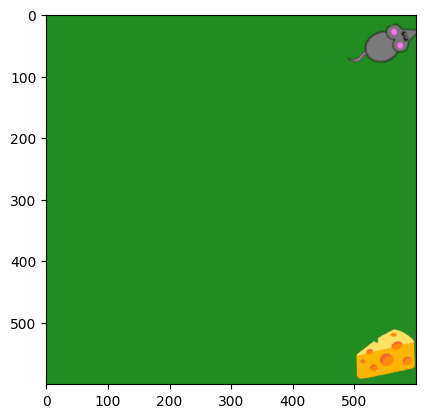

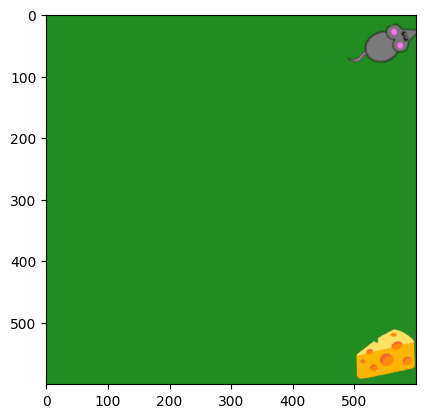

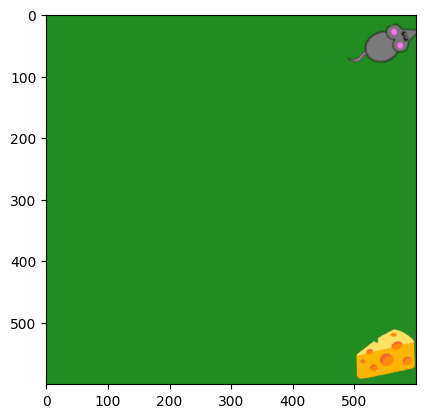

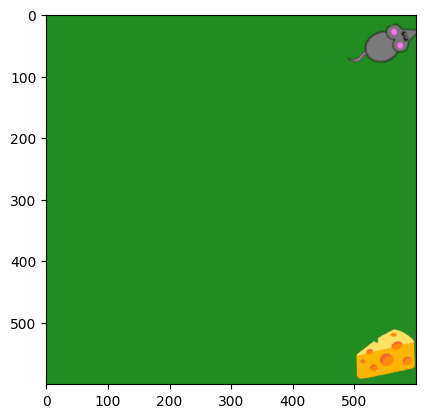

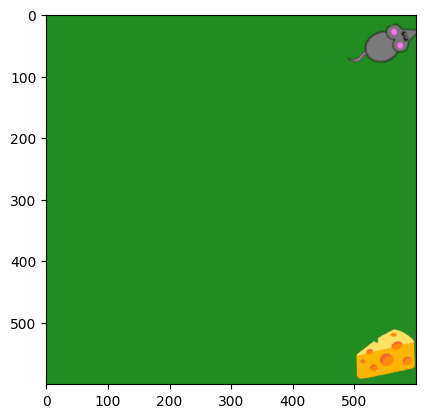

In [5]:
env.reset()
plt.imshow(env.render())
plt.show()

obsList = []
for act in actions:
    obs = env.step(act)
    obsList.append(obs)
    plt.imshow(env.render())
    plt.show()

Let's have a look at the state observations on the final trial.

In [6]:
obsList[-1]

(array([550.        ,  50.        ,  22.23176284, 550.        ,
        550.        ]),
 -0.01,
 False,
 False,
 {})

In [7]:
print(f'The rat reached location {obsList[-1][0][:2]} and is facing the direction {obsList[-1][0][2]} degrees from the x axis. The goal is at location {obsList[-1][0][3:]}.')

if obsList[-1][2]:
    print(f'The rat reached the goal and got a reward of {obsList[-1][1]}.')
else:
    print('The rat did not reach the goal.')

The rat reached location [550.  50.] and is facing the direction 22.231762835403003 degrees from the x axis. The goal is at location [550. 550.].
The rat did not reach the goal.
